In [120]:
from sentence_transformers import SentenceTransformer

In [121]:
model = SentenceTransformer('snunlp/KR-SBERT-Medium-extended-klueNLItriplet_PARpair_QApair-klueSTS')
model = model.to('cuda')

In [122]:
sentences = ["안녕 넌 누구니?", "오늘의 날씨는 어때?", "부산대학교에 대해서 알고 있어?"]

sentence_vec = model.encode(sentences, convert_to_numpy=True)

sentence_vec.shape

(3, 768)

In [123]:
import numpy as np

sentence_vec_mean = np.mean(sentence_vec, axis=0)

sentence_vec_mean.shape

(768,)

In [124]:
import pickle

with open('avg_senti_vec.pkl', 'rb') as file:
    senti_dict = pickle.load(file)

neutral = senti_dict['neutral']

neutral.shape

(768,)

In [125]:
k = 0.7

In [126]:
vec = k * sentence_vec_mean + (1-k) * neutral

vec.shape

(768,)

In [127]:
import json

with open('naver_news/all_social.json', 'r') as f:
    social_news = json.load(f)

In [128]:
news = []

for cont in social_news:
    news.append(cont['contents'])

news

['국민의힘이 전북 당사의 국유지를 무단으로 점거해 부과된 변상금 가운데 상당 부분을 취소해야 한다는 법원 판단이 나왔습니다.\n서울고법 행정4-1부(부장판사 이승련·이광만·정선재)는 국민의힘이 한국자산관리공사(캠코)를 상대로 낸 변상금 부과처분 무효확인 소송 항소심에서 "국민의힘이 변상금과 연체료 2,500만 원을 지급하라"고 원고 일부 승소 판결을 했습니다.\n앞서 캠코는 전북 전주시 풍납동에 있는 국민의힘 전북 당사가 국유지를 무단 점유했다며 2012년 12월부터 2021년 9월까지의 기간에 대해 모두 2억 2,300만원의 변상금을 부과했습니다.\n이에 국민의힘은 국유지를 무단으로 점유·사용한 적이 없다며 불복 소송을 냈습니다.\n1심은 국민의힘이 국유지를 무단으로 사용한 게 맞으므로 변상금 부과는 적법하다며 사실상 원고 패소 판결했습니다.\n1심 재판부는 국유지에 만들어진 진입로 외에는 당사로 들어가는 다른 진입로가 없고, 주차장 내 국유지에 속한 부분과 국유지가 아닌 부분이 물리적 경계 없이 한 공간으로 사용된 점 등을 근거로 삼았습니다.\n그러나 항소심 재판부는 국민의힘 측 주장 일부를 수용해 판단을 뒤집었습니다.\n항소심 재판부는 주차장의 경우 국민의힘이 국유지를 무단으로 점유했다고 단정하기 어렵다고 봤습니다.\n이어 "국유지 중 주차장 부분은 국민의힘 건물 부지상의 주차장과 외관상 구분되는 상태였다"며, "국민의힘 측과 국유지 주차장 부분에 대한 임대차계약이 체결됐다거나 국민의힘 측이 주차장을 관리했다고 단정하기 어렵다"고 덧붙였습니다.\n그러면서 진입로의 경우 국유지를 점유·사용한 것은 맞지만, 캠코가 국민의힘에 30여 년간 변상금 지급 등을 청구하지 않은 점을 고려하면 사용을 명시적 또는 묵시적으로 승낙했다고 봐야 한다고 판단했습니다.\n재판부는 "국민의힘은 최초로 변상금 부과 처분을 받은 날인 2017년 12월까지만 법적 지위를 가지고 있었다고 봐야 한다"며, "2012년 12월부터 2017년 12월까지의 변상금·연체료 부과 처분은 무효"라

In [129]:
news_vec = model.encode(news, convert_to_numpy=True)

In [130]:
best = -float('inf')
idx = -1

for i, n_vec in enumerate(news_vec):
    css = model.similarity(vec, n_vec)

    if css > best:
        best = css
        idx  = i

print(css, idx)

tensor([[0.1005]]) 257


In [131]:
social_news[idx]

{'url': 'https://n.news.naver.com/mnews/article/014/0005183816',
 'media': '파이낸셜뉴스',
 'title': '"아내 나가면 전화줘요"..유부남과 불륜 과거 있는 여친과 헤어져야 하나? [어떻게 생각하세요]',
 'date': '2024.05.11. 오전 8:01',
 'contents': '[파이낸셜뉴스] 과거 유부남 회사 팀장과 불륜 관계를 지속한 여자친구와 이별을 고민 중인 남성의 사연이 알려졌다.\n지난 8일 직장인 익명 커뮤니티 \'블라인드\'에는 \'(과거) 불륜 저지른 예쁜 여친\'이라는 제목으로 "불륜 과거 있는 애인, 이해할 수 있냐"라는 글이 올라왔다.\n글쓴이 A씨는 "여자친구의 사진첩을 같이 보다가 전 팀장이랑 카톡한 거 잘못 캡처된 건지 어쨌든 보게 됐다. 나랑 사귀기 전이긴 한데 이게 대화 내용"이라며 메시지를 공개했다.\n메시지를 보면, 여자 친구 회사의 팀장이었던 남성이 "\'범죄도시2\' 용산(에서 보는 건) 어때?"라고 물었다. 그러자 여자친구는 "거긴 사람들 마주치지 않을까요?"라고 답했다.\n이에 남성이 "그럼 강서 쪽으로 갈까?"라고 장소를 정하자, 여자 친구는 "네! 아내분 나가시면 전화 한 통 주세요"라고 말했다.\nA씨는 "멘탈 나가서 미치겠다. 여자친구에게 추궁했더니 반년간 만났다고 하더라. 지금은 안 그러는 것 같다"면서 이별 여부에 대한 투표를 올렸다.\n10일 15시 기준 2410명이 투표에 참여한 가운데, 93.6%가 \'정신 차리고 헤어져라\'고 투표했다. 반면 8.6%는 \'내 스타일이면 참고 만난다\'고 투표했다.\n누리꾼들은 "바람은 버릇이다. 못 고친다", "껍데기는 늙지만 천성은 죽을 때까지 변하지 않는다", "이걸 고민하냐", "기본적인 도덕관 문제다", "신뢰가 없으면 그 관계를 지속해야 할 이유도 없다" 등 댓글을 남겼다.\n#유부남 #블라인드 #어떻게생각하세요 #불륜여친\n'}

In [132]:
selected = news[idx]

selected

'[파이낸셜뉴스] 과거 유부남 회사 팀장과 불륜 관계를 지속한 여자친구와 이별을 고민 중인 남성의 사연이 알려졌다.\n지난 8일 직장인 익명 커뮤니티 \'블라인드\'에는 \'(과거) 불륜 저지른 예쁜 여친\'이라는 제목으로 "불륜 과거 있는 애인, 이해할 수 있냐"라는 글이 올라왔다.\n글쓴이 A씨는 "여자친구의 사진첩을 같이 보다가 전 팀장이랑 카톡한 거 잘못 캡처된 건지 어쨌든 보게 됐다. 나랑 사귀기 전이긴 한데 이게 대화 내용"이라며 메시지를 공개했다.\n메시지를 보면, 여자 친구 회사의 팀장이었던 남성이 "\'범죄도시2\' 용산(에서 보는 건) 어때?"라고 물었다. 그러자 여자친구는 "거긴 사람들 마주치지 않을까요?"라고 답했다.\n이에 남성이 "그럼 강서 쪽으로 갈까?"라고 장소를 정하자, 여자 친구는 "네! 아내분 나가시면 전화 한 통 주세요"라고 말했다.\nA씨는 "멘탈 나가서 미치겠다. 여자친구에게 추궁했더니 반년간 만났다고 하더라. 지금은 안 그러는 것 같다"면서 이별 여부에 대한 투표를 올렸다.\n10일 15시 기준 2410명이 투표에 참여한 가운데, 93.6%가 \'정신 차리고 헤어져라\'고 투표했다. 반면 8.6%는 \'내 스타일이면 참고 만난다\'고 투표했다.\n누리꾼들은 "바람은 버릇이다. 못 고친다", "껍데기는 늙지만 천성은 죽을 때까지 변하지 않는다", "이걸 고민하냐", "기본적인 도덕관 문제다", "신뢰가 없으면 그 관계를 지속해야 할 이유도 없다" 등 댓글을 남겼다.\n#유부남 #블라인드 #어떻게생각하세요 #불륜여친\n'

In [133]:
import re
selected = re.sub('[^가-힣]', ' ', selected)

selected

' 파이낸셜뉴스  과거 유부남 회사 팀장과 불륜 관계를 지속한 여자친구와 이별을 고민 중인 남성의 사연이 알려졌다  지난  일 직장인 익명 커뮤니티  블라인드 에는   과거  불륜 저지른 예쁜 여친 이라는 제목으로  불륜 과거 있는 애인  이해할 수 있냐 라는 글이 올라왔다  글쓴이  씨는  여자친구의 사진첩을 같이 보다가 전 팀장이랑 카톡한 거 잘못 캡처된 건지 어쨌든 보게 됐다  나랑 사귀기 전이긴 한데 이게 대화 내용 이라며 메시지를 공개했다  메시지를 보면  여자 친구 회사의 팀장이었던 남성이   범죄도시   용산 에서 보는 건  어때  라고 물었다  그러자 여자친구는  거긴 사람들 마주치지 않을까요  라고 답했다  이에 남성이  그럼 강서 쪽으로 갈까  라고 장소를 정하자  여자 친구는  네  아내분 나가시면 전화 한 통 주세요 라고 말했다   씨는  멘탈 나가서 미치겠다  여자친구에게 추궁했더니 반년간 만났다고 하더라  지금은 안 그러는 것 같다 면서 이별 여부에 대한 투표를 올렸다    일   시 기준     명이 투표에 참여한 가운데       가  정신 차리고 헤어져라 고 투표했다  반면     는  내 스타일이면 참고 만난다 고 투표했다  누리꾼들은  바람은 버릇이다  못 고친다    껍데기는 늙지만 천성은 죽을 때까지 변하지 않는다    이걸 고민하냐    기본적인 도덕관 문제다    신뢰가 없으면 그 관계를 지속해야 할 이유도 없다  등 댓글을 남겼다   유부남  블라인드  어떻게생각하세요  불륜여친 '

In [134]:
import konlpy

kkma = konlpy.tag.Kkma()

In [135]:
nouns = kkma.nouns(selected)

nouns[:10]

['파이낸셜', '파이낸셜뉴스', '뉴스', '과거', '유부남', '회사', '팀장', '불륜', '관계', '지속']

In [136]:
nouns_vec = model.encode(nouns, convert_to_numpy=True)

In [137]:
css_list = []

# Calculate similarity for each vector and store the results
for i, n_vec in enumerate(nouns_vec):
    css = model.similarity(vec, n_vec)
    css_list.append((i, css))

# Sort the list by css values in descending order
css_list_sorted = sorted(css_list, key=lambda x: x[1], reverse=True)

In [138]:
import math

dic_word = {}

for idx, css in css_list_sorted:
    freq = int(float(css) * 100)

    if freq > 0:
        dic_word[nouns[idx]] = freq

len(dic_word)

81

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

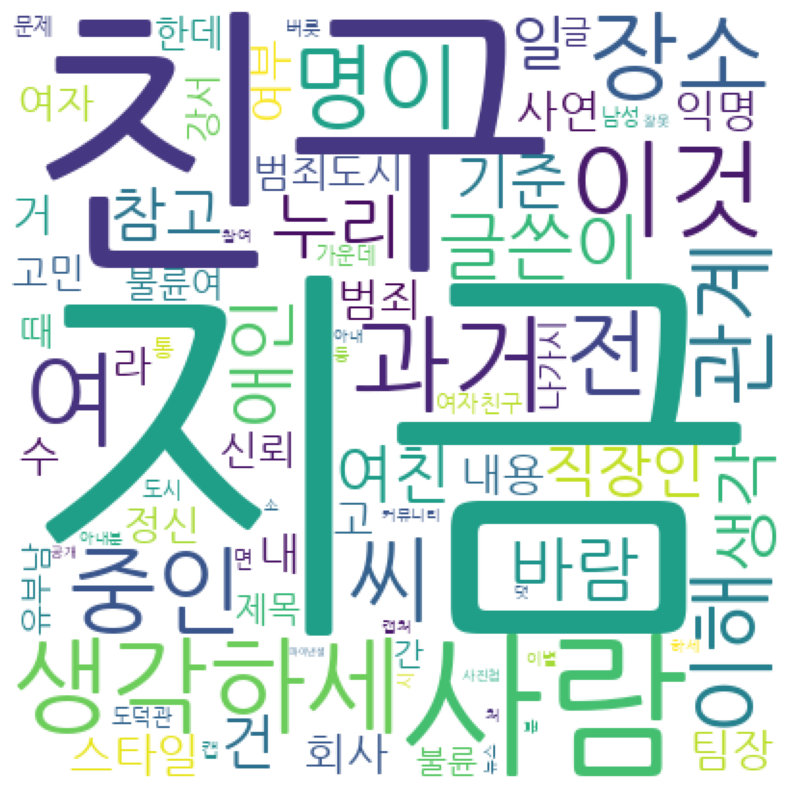

In [140]:
font_path = r'nanum_gothic.TTF'  # 폰트 경로 확인 및 수정
wc = WordCloud(random_state=123, font_path=font_path, width=400, height=400, background_color='white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기